In [25]:
from __future__ import division
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [26]:
df=pd.read_csv('retirementproject.csv')
df['p1return']=df['portfolio1'].pct_change(1)
df['p2return']=df['portfolio2'].pct_change(1)
df['p3return']=df['portfolio3'].pct_change(1)
df['p1rspreturn']=df['portfolio1rsp'].pct_change(1)
df['p2rspreturn']=df['portfolio2rsp'].pct_change(1)
df['p3rspreturn']=df['portfolio3rsp'].pct_change(1)
dfreturn=df[['p1return','p2return','p3return','p1rspreturn','p2rspreturn','p3rspreturn']].dropna()
dfreturn.head()

,p1return,p2return,p3return,p1rspreturn,p2rspreturn,p3rspreturn
1,-0.010749,0.008377,0.022065,0.989251,1.008377,1.022065
2,-0.007172,-0.016075,-0.020075,0.495600,0.482009,0.474614
3,0.031325,0.037981,0.038675,0.367639,0.374010,0.374077
4,0.033808,0.037280,0.036643,0.279647,0.281844,0.280764
5,-0.029171,-0.030180,-0.027009,0.162975,0.160579,0.163520


In [27]:
#計算單筆報酬率
dt=1/12
mu=dfreturn.mean()['p1return']*12
sigma=dfreturn.std()['p1return']*(12**(1/2))
mu2=dfreturn.mean()['p2return']*12
sigma2=dfreturn.std()['p2return']*(12**(1/2))
mu3=dfreturn.mean()['p3return']*12
sigma3=dfreturn.std()['p3return']*(12**(1/2))
print(mu)
print(mu2)
print(mu3)

0.07488811720953525
0.0698136721339623
0.06813810352667814


In [28]:
def stock_monte_carlo(start_price,months,mu,sigma):
    ''' This function takes in starting stock price, days of simulation,mu,sigma, and returns simulated price array'''
    # Define a price array
    price = np.zeros(months)
    price[0] = start_price
    # Schok and Drift
    shock = np.zeros(months)
    drift = np.zeros(months)

    # Run price array for number of days
    for x in range(1,months):

        # Calculate Schock
        shock[x] = np.random.normal(loc=mu * dt, scale=sigma * np.sqrt(dt))
        # Calculate Drift
        drift[x] = mu * dt
        # Calculate Price
        price[x] = price[x-1]*np.exp((mu-0.5*sigma**2)*dt+sigma*np.sqrt(dt)*np.random.standard_normal())

    return price

In [29]:
def rsp_total(rsp_price,months,mu,sigma):
    result=0
    for i in range(months):
        result+=stock_monte_carlo(rsp_price,months-i,mu,sigma)[-1]
    return result

def rsp_monte_carlo(rsp_price,months,mu,sigma):
    price = np.zeros(months)
    price[0] = rsp_price
    for x in range(1,months):
        price[x] = rsp_total(rsp_price,x+1,mu,sigma)
    return price


In [30]:
print(rsp_total(5000,36,mu,sigma))
print(rsp_total(5000,36,mu2,sigma2))
print(stock_monte_carlo(5000,36,mu,sigma)[35])
print(stock_monte_carlo(5000,36,mu2,sigma2)[35])

201170.69346493448
203409.4630736499
5859.940023710103
7428.5299278845005


Text(0.5,1,'Monte Carlo Analysis for Portfolio1')

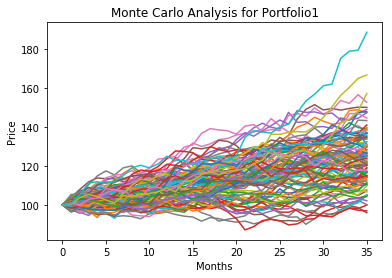

In [31]:
#設定投資天期、初始投入金額與定期定額金額 
start_price=100
rsp_price=100
months=36

for run in range(100):
    plt.plot(stock_monte_carlo(start_price,months,mu,sigma))
plt.xlabel("Months")
plt.ylabel("Price")  
plt.title('Monte Carlo Analysis for Portfolio1')


In [32]:
# Set a large numebr of runs
runs = 10000

# Create an empty matrix to hold the end price data
simulations = np.zeros(runs)
simulations2 = np.zeros(runs)
simulations3 = np.zeros(runs)
simulationsrsp = np.zeros(runs)
simulationsrsp2 = np.zeros(runs)
simulationsrsp3 = np.zeros(runs)

# Set the print options of numpy to only display 0-5 points from an array to suppress output
np.set_printoptions(threshold=5)

for run in range(runs):    
    # Set the simulation data point as the last stock price for that run
    simulations[run] = stock_monte_carlo(start_price,months,mu,sigma)[months-1]
    simulations2[run] = stock_monte_carlo(start_price,months,mu2,sigma2)[months-1]
    simulations3[run] = stock_monte_carlo(start_price,months,mu3,sigma3)[months-1]
    simulationsrsp[run] = rsp_total(rsp_price,months,mu,sigma)
    simulationsrsp2[run] = rsp_total(rsp_price,months,mu2,sigma2)
    simulationsrsp3[run] = rsp_total(rsp_price,months,mu3,sigma3)


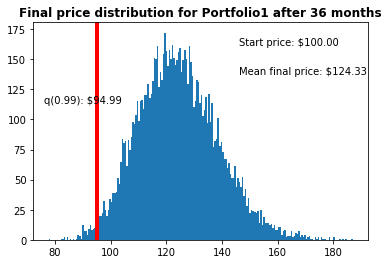

In [33]:
#define q as the 1% empirical qunatile, this basically means that 99% of the values should fall between here
q = np.percentile(simulations, 1)

# plot the distribution of the end prices
plt.hist(simulations,bins=200)

# Using plt.figtext to fill in some additional information onto the plot

# Starting Price
plt.figtext(0.6, 0.8, s="Start price: $%.2f" %start_price)
# Mean ending price
plt.figtext(0.6, 0.7, "Mean final price: $%.2f" % simulations.mean())

# Display 1% quantile
plt.figtext(0.15, 0.6, "q(0.99): $%.2f" % q)

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')

# Title
plt.title(u"Final price distribution for Portfolio1 after %s months" % months, weight='bold');


In [34]:
#portfolio1,單筆100，定期定額100 
print(simulations.max())
print(np.percentile(simulations,95))
print(simulations.mean())
print(np.percentile(simulations,5))
print(simulations.min())
print(simulationsrsp.max())
print(np.percentile(simulationsrsp,95))
print(simulationsrsp.mean())
print(np.percentile(simulationsrsp,5))
print(simulationsrsp.min())

186.98609417643743
148.6020735454879
124.32992926608893
102.72197837964872
77.73931233671784
4261.710319761344
4117.742319268575
4023.2982584662823
3931.7413613694257
3805.9519374752817


In [35]:
#portfolio2,單筆100，定期定額100 
print(simulations2.max())
print(np.percentile(simulations2,95))
print(simulations2.mean())
print(np.percentile(simulations2,5))
print(simulations2.min())
print(simulationsrsp2.max())
print(np.percentile(simulationsrsp2,95))
print(simulationsrsp2.mean())
print(np.percentile(simulationsrsp2,5))
print(simulationsrsp2.min())

203.4084581396593
153.12351464886993
122.73749286042485
96.75943422422897
71.63665478061101
4278.0934949060875
4105.083026515891
3993.4241231985025
3881.594833298745
3681.3705033221277


In [36]:
#portfolio3,單筆100，定期定額100 
print(simulations3.max())
print(np.percentile(simulations3,95))
print(simulations3.mean())
print(np.percentile(simulations3,5))
print(simulations3.min())
print(simulationsrsp3.max())
print(np.percentile(simulationsrsp3,95))
print(simulationsrsp3.mean())
print(np.percentile(simulationsrsp3,5))
print(simulationsrsp3.min())

236.44361726921792
159.76053044874698
122.04348806082413
91.71921391478223
65.52236016318419
4353.774307292124
4124.57079570852
3984.062904823093
3851.086645402509
3696.011033611699
